In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bioAI.mplstyle")
import scipy
import astropy

## Load data

In [2]:
def data_scope(arr, t_arr, t_start, t_stop):
    idxs = np.where((t_arr >= t_start) & (t_arr <= t_stop))[0]
    return arr[idxs]

def spike_scope(spikes, t_arr):
    hists = []
    for spike_train in spikes.item().values():
        hist, _ = np.histogram(spike_train, bins=np.append(t_arr, t_arr[-1] + t_arr[1] - t_arr[0]))
        hists.append(hist)
    hists = np.array(hists)
    return hists

In [3]:
data_path = '/home/vemundss/Downloads/Toroidal_topology_grid_cell_data/'

In [4]:
with open(data_path + 'rat_q_sessions.txt') as file:
#with open(data_path + 'rat_r_day1_sessions.txt') as file:
#with open(data_path + 'rat_r_day2_sessions.txt') as file:
#with open(data_path + 'rat_s_sessions.txt') as file:
    sessions = file.readlines()
sessions

['#1,  sleep_box_1,        start=9576, end=18812   \n',
 '#2,  wagon_wheel_1,      start=18977, end=25355   \n',
 '#3,  sleep_box_2,        start=25403, end=27007   \n',
 '#4,  open_field_1,       start=27826, end=31223   \n']

In [5]:
data = {}

In [6]:
f = np.load(data_path + 'rat_q_grid_modules_1_2.npz', allow_pickle=True)
x = f['x']
y = f['y']
t = f['t']
spikes1 = f['spikes_mod1']
spikes2 = f['spikes_mod2']

t_start, t_stop = 27826, 31223
x = data_scope(f['x'], f['t'], t_start, t_stop)
y = data_scope(f['y'], f['t'], t_start, t_stop)
t = data_scope(f['t'], f['t'], t_start, t_stop)
spikes1 = spike_scope(f['spikes_mod1'], t)
spikes2 = spike_scope(f['spikes_mod2'], t)

data['rat_q'] = {'x': x, 'y': y, 't': t, 'modules': {1: spikes1, 2: spikes2}}

In [7]:
f = np.load(data_path + 'rat_r_day1_grid_modules_1_2_3.npz', allow_pickle=True)
x = f['x']
y = f['y']
t = f['t']
spikes1 = f['spikes_mod1']
spikes2 = f['spikes_mod2']
spikes3 = f['spikes_mod3']

t_start, t_stop = 7457, 14778
x = data_scope(f['x'], f['t'], t_start, t_stop)
y = data_scope(f['y'], f['t'], t_start, t_stop)
t = data_scope(f['t'], f['t'], t_start, t_stop)
spikes1 = spike_scope(f['spikes_mod1'], t)
spikes2 = spike_scope(f['spikes_mod2'], t)
spikes3 = spike_scope(f['spikes_mod3'], t)

data['rat_r_day1'] = {'x': x, 'y': y, 't': t, 'modules': {1: spikes1, 2: spikes2, 3: spikes3}}

# can add second slice (valid times) 14890, 16045 here

In [8]:
f = np.load(data_path + 'rat_r_day2_grid_modules_1_2_3.npz', allow_pickle=True)
x = f['x']
y = f['y']
t = f['t']
spikes1 = f['spikes_mod1']
spikes2 = f['spikes_mod2']
spikes3 = f['spikes_mod3']

t_start, t_stop = 10617, 13004
x = data_scope(f['x'], f['t'], t_start, t_stop)
y = data_scope(f['y'], f['t'], t_start, t_stop)
t = data_scope(f['t'], f['t'], t_start, t_stop)
spikes1 = spike_scope(f['spikes_mod1'], t)
spikes2 = spike_scope(f['spikes_mod2'], t)
spikes3 = spike_scope(f['spikes_mod3'], t)

data['rat_r_day2'] = {'x': x, 'y': y, 't': t, 'modules': {1: spikes1, 2: spikes2, 3: spikes3}}

In [9]:
f = np.load(data_path + 'rat_s_grid_modules_1.npz', allow_pickle=True)
x = f['x']
y = f['y']
t = f['t']
spikes1 = f['spikes_mod1']

t_start, t_stop = 9939, 12363
x = data_scope(f['x'], f['t'], t_start, t_stop)
y = data_scope(f['y'], f['t'], t_start, t_stop)
t = data_scope(f['t'], f['t'], t_start, t_stop)
spikes1 = spike_scope(f['spikes_mod1'], t)

data['rat_s'] = {'x': x, 'y': y, 't': t, 'modules': {1: spikes1}}

## Create ratemaps

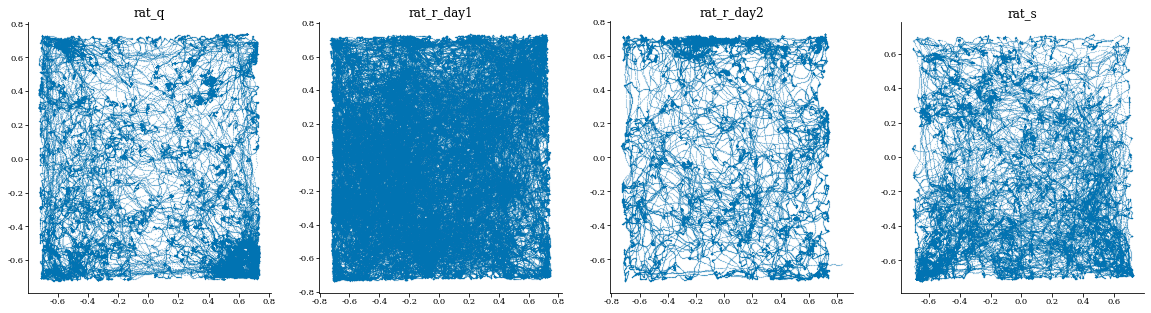

In [10]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))
for i, (rat, rat_data) in enumerate(data.items()):
    axs[i].scatter(rat_data['x'], rat_data['y'], s=0.01)
    axs[i].set_title(rat)

In [11]:
res = 32
all_ratemaps = []
for rat_i, data_i in data.items():
    x, y = data_i['x'], data_i['y']
    for module_j, spikes_j in data_i['modules'].items():
        ratemaps_ij = scipy.stats.binned_statistic_2d(x, y, spikes_j, bins=res).statistic
        all_ratemaps.append(ratemaps_ij)

In [99]:
ssum = 0
for ratemaps in all_ratemaps:
    print(len(ratemaps))
    ssum += len(ratemaps)
print(ssum)

97
66
166
168
149
189
172
183
140
1330


In [12]:
def multiimshow(zz, figsize=(1,1), normalize=True, add_colorbar=True, rect=(0,0,1,0.87), axes_pad=0.05, **kwargs):
    # prepare figure
    ncols = int(np.ceil(np.sqrt(zz.shape[0])))
    nrows = int(round(np.sqrt(zz.shape[0])))
    from mpl_toolkits.axes_grid1 import ImageGrid
    fig = plt.figure(figsize=figsize)
    if add_colorbar and normalize:
        grid = ImageGrid(fig, rect=rect, nrows_ncols=(nrows, ncols), axes_pad=axes_pad, cbar_mode='single', cbar_location='right', cbar_pad=0.1, cbar_size='5%')
    else:
        grid = ImageGrid(fig, rect=rect, nrows_ncols=(nrows, ncols), axes_pad=axes_pad)
    vmin, vmax = (np.nanmin(zz), np.nanmax(zz)) if normalize else (None, None)
    # plot response maps using imshow
    for ax, data in zip(grid, zz):
        im = ax.imshow(data, vmin=vmin, vmax=vmax, **kwargs)
    [ax.axis('off') for ax in grid]
    fig.colorbar(im, cax=grid.cbar_axes[0]) if (normalize and add_colorbar) else None
    return fig, grid.axes_all

## Calculate grid statistics

In [13]:
import spatial_maps as sm
ratemaps = all_ratemaps[3]
ratemaps = np.array([astropy.convolution.convolve(ratemaps[i], astropy.convolution.Gaussian2DKernel(2), boundary='wrap') for i in range(ratemaps.shape[0])])
center_peaks = np.array([sm.find_peaks(ratemaps[i])[0] for i in range(ratemaps.shape[0])])
acorrs = np.array([sm.autocorrelation(ratemap) for ratemap in ratemaps])
peaks = [sm.find_peaks(acorr) for acorr in acorrs]
thetas = np.array([sm.spacing_and_orientation(peak, acorrs.shape[-1])[1] for peak in peaks])
spacings = np.array([sm.spacing_and_orientation(peak, acorrs.shape[-1])[0] for peak in peaks])
# get the most common spacing
bins=25
hist, bin_edges = np.histogram(spacings, bins=bins)
spacing = bin_edges[np.argmax(hist)] + (bin_edges[1] - bin_edges[0])/2
hist, bin_edges = np.histogram(thetas, bins=bins)
theta = bin_edges[np.argmax(hist)] + (bin_edges[1] - bin_edges[0])/2

from methods import Hexagon, HexagonalGCs
radius = spacing/np.sqrt(3) # spacing is peak-to-peak distance
orientation = theta*180/np.pi - 15 # theta is angle from x-axis
hexagon = HexagonalGCs(f=2/(3*radius), init_rot=orientation)
hexagon.set_phases(hexagon.unit_cell.wrap(center_peaks-res/2)) # WRAPPY?
#hexagon.set_phases(center_peaks-res/2-1) # WRAPPY?
random_hexagon = HexagonalGCs(f=2/(3*radius), init_rot=orientation)
random_hexagon.set_phases(random_hexagon.unit_cell.wrap(np.around(random_hexagon.unit_cell.sample(len(center_peaks)))))

Text(0.5, 0, 'Angle [rad]')

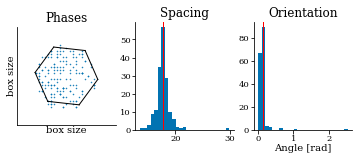

In [14]:
fig, axs = plt.subplots(ncols=3, figsize=(6, 2))
axs[0].scatter(*(center_peaks-res/2).T)
axs[0].set_xlim(-res/2, res/2)
axs[0].set_ylim(-res/2, res/2)
hexagon.unit_cell.plot(fig, axs[0], color='black')#, center=np.zeros(2)+res/2-1)
#ax.scatter(*(center_peaks-res/2).T, color='green', alpha=.2)
axs[0].set_title('Phases')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_aspect('equal')
axs[0].set_xlabel('box size')
axs[0].set_ylabel('box size')
axs[1].hist(spacings, bins=bins)
axs[1].axvline(spacing, color='r')
axs[1].set_title('Spacing')
axs[2].hist(thetas, bins=bins)
axs[2].axvline(theta, color='r')
axs[2].set_title('Orientation')
axs[2].set_xlabel('Angle [rad]')

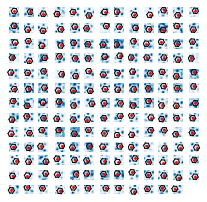

In [15]:
fig, axs = multiimshow(ratemaps.transpose(0,2,1), origin='lower', figsize=(3,3), normalize=False);
for i in range(len(center_peaks)):
    axs[i].scatter(*center_peaks[i], color='red', s=3)
    hexagon.unit_cell.plot(fig, axs[i], center=center_peaks[i], color='black')

## KDE, Ripley and Grid score of phases

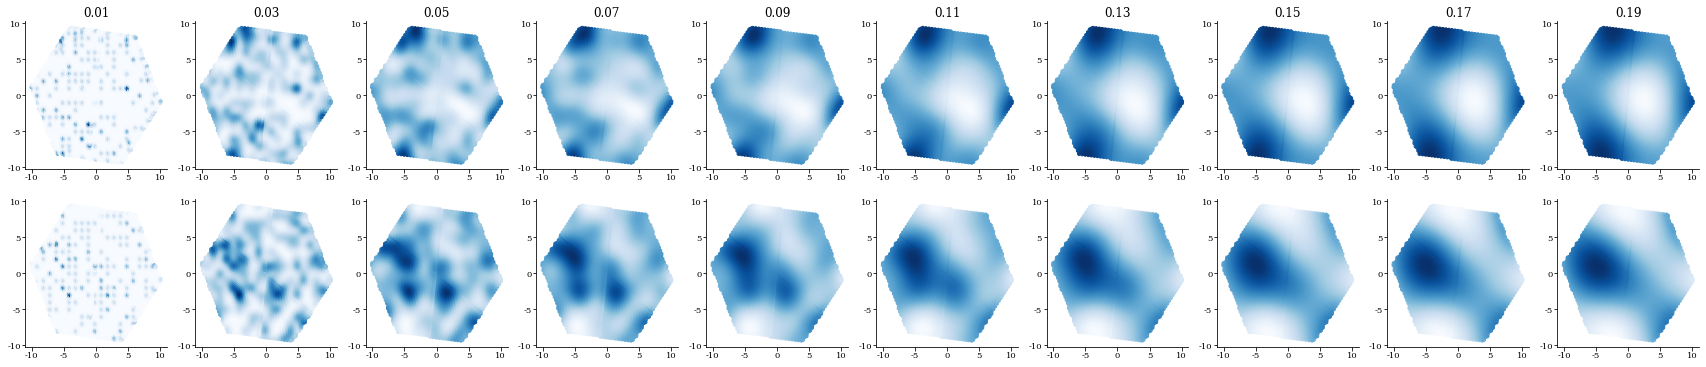

In [16]:
bw_method = np.linspace(0, 0.2, 21)[1:]#hexagon.unit_cell.radius/2/10, 21)[1:]
fig, axs = plt.subplots(nrows=2, ncols=len(bw_method)//2, figsize=(len(bw_method)//2*3, 3*2))
for i, r in enumerate(bw_method[::2]):
    kde, mesh, _, _ = hexagon.phase_kde(bw_method=r, res=64)
    axs[0,i].scatter(*mesh.T, c=kde, s=10)
    axs[0,i].set_title(f'{r:.2f}')


for i, r in enumerate(bw_method[::2]):
    kde, mesh, _, _ = random_hexagon.phase_kde(bw_method=r, res=64)
    axs[1,i].scatter(*mesh.T, c=kde, s=10)

100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


Text(0, 0.5, "Ripley's H")

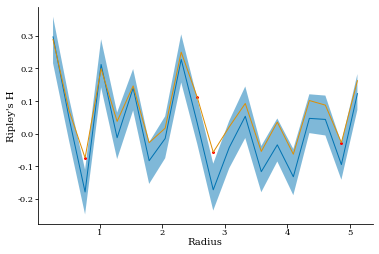

In [17]:
import tqdm
radii = np.linspace(0, hexagon.unit_cell.radius/2, 21)[1:]
random_ripleys = []
for _ in tqdm.trange(100):
    random_hexagon.set_phases(random_hexagon.unit_cell.wrap(np.around(random_hexagon.unit_cell.sample(len(center_peaks)))))
    random_ripleys_i = [random_hexagon.ripleys(r) for r in radii]
    random_ripleys.append(random_ripleys_i)
random_ripleys = np.array(random_ripleys)

ripleys = [hexagon.ripleys(r) for r in radii]
ripleys = np.array(ripleys)
plt.plot(radii, np.mean(random_ripleys, axis=0))
plt.fill_between(radii, np.percentile(random_ripleys, 2.5, axis=0), np.percentile(random_ripleys, 97.5, axis=0), alpha=0.5)
plt.plot(radii, ripleys)
# plot star where significant
plt.scatter(radii[ripleys > np.percentile(random_ripleys, 97.5, axis=0)], 
            ripleys[ripleys > np.percentile(random_ripleys, 97.5, axis=0)], color='red', marker='*', s=5)
plt.xlabel('Radius')
plt.ylabel('Ripley\'s H')

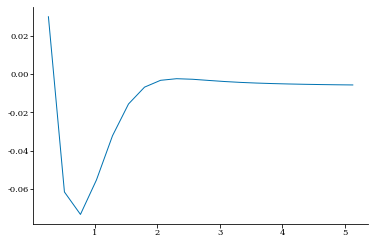

In [18]:
grid_scores = [hexagon.grid_score(bw_method=r) for r in bw_method]
plt.plot(radii, grid_scores)

In [165]:
def random_shift_ratemaps(ratemaps):
    # ratemaps shape: (n_cells, res, res)
    shift = ratemaps.shape[1] - 1
    ratemaps = np.array([np.roll(ratemaps[i], np.random.randint(0, shift), axis=1) for i in range(ratemaps.shape[0])])
    ratemaps = np.array([np.roll(ratemaps[i], np.random.randint(0, shift), axis=0) for i in range(ratemaps.shape[0])])
    return ratemaps

def local_smoothness2(ratemaps):
    # ratemaps shape: (n_cells, res, res)
    from scipy.ndimage import convolve
    kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    ratemaps = np.array([convolve(ratemaps[i], kernel, mode='constant', cval=0.0) for i in range(ratemaps.shape[0])])
    return ratemaps

def ci_fn(ratemaps):
    local_scale_x = np.linalg.norm(np.diff(ratemaps, axis=1)[:,:,:-1], axis=0)
    local_scale_y = np.linalg.norm(np.diff(ratemaps, axis=2)[:,:-1,:], axis=0)
    return np.var(np.concatenate([local_scale_x.flatten(), local_scale_y.flatten()]))
    #return np.sum(np.diff(ratemaps, axis=1)[:,:,:-1]**2 - np.diff(ratemaps, axis=2)[:,:-1,:]**2)**2,axis=0)
    #return (np.linalg.norm(np.diff(ratemaps, axis=1)[:,:,:-1], axis=0) - np.linalg.norm(np.diff(ratemaps, axis=2)[:,:-1,:], axis=0)**2)

def local_smoothness(ratemaps):
    #return np.sum((np.diff(ratemaps, axis=1)[:,:,:-1]**2 + np.diff(ratemaps, axis=2)[:,:-1,:]**2)**2)
    return np.sum((np.diff(ratemaps, axis=1)[:,:,:-1]**2 + np.diff(ratemaps, axis=2)[:,:-1,:]**2)**2)

def local_energy_variation(ratemaps):
    energymaps = np.linalg.norm(ratemaps, axis=0)
    local_energy_change_x = np.diff(energymaps, axis=1)[:-1]**2
    local_energy_change_y = np.diff(energymaps, axis=0)[:,:-1]**2
    return np.var(np.concatenate([local_energy_change_x.flatten(), local_energy_change_y.flatten()]))
    #local_energy_change = np.diff(energymaps, axis=1)[:-1]**2 + np.diff(energymaps, axis=0)[:,:-1]**2
    #return np.var(local_energy_change)

In [166]:
cis = []
perm_cis = []
random_shifted_cis = []
for ratemaps in all_ratemaps:
    ratemaps = np.array([astropy.convolution.convolve(ratemaps[i], astropy.convolution.Gaussian2DKernel(1), boundary='wrap') for i in range(ratemaps.shape[0])])
    ci = ci_fn(ratemaps)#.var()
    perm_ci = ci_fn(np.random.permutation(ratemaps.reshape(-1,32**2).T).T.reshape(-1,32,32))#.var()
    random_shifted_ci = ci_fn(random_shift_ratemaps(ratemaps))#.var()
    cis.append(ci)
    perm_cis.append(perm_ci)
    random_shifted_cis.append(random_shifted_ci)

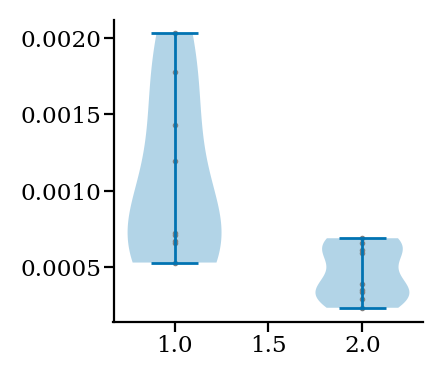

In [167]:
# plot the results as violin plot, include the data points
# using matplotlib
fig, ax = plt.subplots(figsize=(2,2),dpi=200)
ax.violinplot([cis, random_shifted_cis])#, showmeans=False, showmedians=True)
ax.scatter(np.ones(len(cis)), cis, color='grey', s=1)
ax.scatter(np.ones(len(random_shifted_cis))*2, random_shifted_cis, color='grey', s=1)

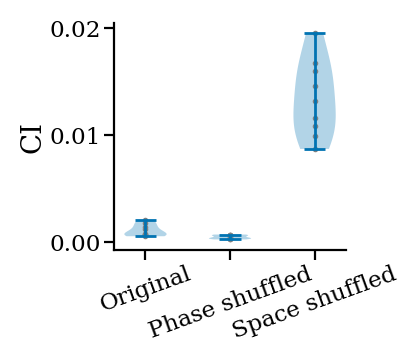

MannwhitneyuResult(statistic=74.0, pvalue=0.003568628436933387)
MannwhitneyuResult(statistic=0.0, pvalue=0.00041229480206169127)
MannwhitneyuResult(statistic=0.0, pvalue=0.00041229480206169127)


In [168]:
# plot the results as violin plot, include the data points
# using matplotlib
fig, ax = plt.subplots(figsize=(1.5,1.5),dpi=200)
ax.violinplot([cis, random_shifted_cis, perm_cis])#, showmeans=False, showmedians=True)
ax.scatter(np.ones(len(cis)), cis, color='grey', s=1)
ax.scatter(np.ones(len(random_shifted_cis))*2, random_shifted_cis, color='grey', s=1)
ax.scatter(np.ones(len(perm_cis))*3, perm_cis, color='grey', s=1)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Original', 'Phase shuffled', 'Space shuffled'])
ax.set_ylabel('CI')
# reorient the tick labels
plt.xticks(rotation=20)
plt.show()
# calculate p-values using a mann-whitney u test
from scipy.stats import mannwhitneyu
print(mannwhitneyu(cis, random_shifted_cis))
print(mannwhitneyu(cis, perm_cis))
print(mannwhitneyu(random_shifted_cis, perm_cis))



In [169]:
norms = []
perm_norms = []
random_shifted_norms = []
for ratemaps in all_ratemaps:
    ncells = ratemaps.shape[0]
    ratemaps = np.array([astropy.convolution.convolve(ratemaps[i], astropy.convolution.Gaussian2DKernel(1), boundary='wrap') for i in range(ratemaps.shape[0])])
    #norms.append(np.var(np.linalg.norm(ratemaps, axis=0)**2))
    #perm_norms.append(np.var(np.linalg.norm(np.random.permutation(ratemaps.flatten()).reshape(ncells, 32, 32), axis=0)**2))
    #random_shifted_norms.append(np.var(np.linalg.norm(random_shift_ratemaps(ratemaps), axis=0)**2))
    #norms.append(local_smoothness(np.linalg.norm(ratemaps, axis=0)[None]).mean())
    #perm_norms.append(local_smoothness(np.linalg.norm(np.random.permutation(ratemaps.flatten()).reshape(ncells, 32, 32), axis=0)[None]).mean())
    #random_shifted_norms.append(local_smoothness(np.linalg.norm(random_shift_ratemaps(ratemaps), axis=0)[None]).mean())
    norms.append(local_energy_variation(ratemaps))
    perm_norms.append(local_energy_variation(np.random.permutation(ratemaps.flatten()).reshape(ncells, 32, 32)))
    random_shifted_norms.append(local_energy_variation(random_shift_ratemaps(ratemaps)))

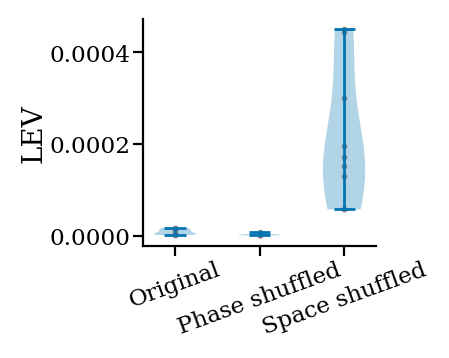

MannwhitneyuResult(statistic=0.0, pvalue=0.00041229480206169127)
MannwhitneyuResult(statistic=68.0, pvalue=0.01711823970479015)
MannwhitneyuResult(statistic=81.0, pvalue=0.00041229480206169127)


In [172]:
fig, ax = plt.subplots(figsize=(1.5,1.5), dpi=200)
ax.violinplot([norms, random_shifted_norms, perm_norms])
ax.scatter(np.ones(len(norms)), norms, color='grey', s=1)
ax.scatter(np.ones(len(random_shifted_norms))*2, random_shifted_norms, color='grey', s=1)
ax.scatter(np.ones(len(perm_norms))*3, perm_norms, color='grey', s=1)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Original', 'Phase shuffled', 'Space shuffled'])
ax.set_ylabel('LEV')
#ax.set_yscale('log')
# reorient the tick labels
plt.xticks(rotation=20)
plt.show()
# calculate p-values using a mann-whitney u test
from scipy.stats import mannwhitneyu
print(mannwhitneyu(norms, perm_norms))
print(mannwhitneyu(norms, random_shifted_norms))
print(mannwhitneyu(perm_norms, random_shifted_norms))


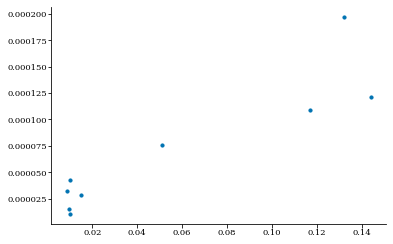

In [ ]:
plt.scatter(norms, cis, s=10)

array([0.00096336])

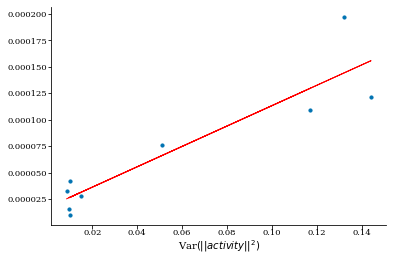

In [77]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(norms)[:,None], np.array(cis))
reg.score(np.array(norms)[:,None], np.array(cis))
# plot the points and the regression line
plt.scatter(norms, cis, s=10)
plt.plot(norms, reg.predict(np.array(norms)[:,None]), color='red')
plt.xlabel('Var'+r'$(||activity||^2)$')
reg.coef_